# Extracting Abstract Keywords using NLP
### NIPS dataset is used  from kaggle
### NLTK for the NLP tools

## DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Downloads/papers.csv')
dataset.head()
df_remove = dataset[dataset['abstract'] == 'Abstract Missing'].index
dataset.drop(df_remove, inplace=True)
dataset.drop(columns = ['event_type'], inplace=True)
dataset.head()

,id,year,title,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...


### Gather the word count for the paper abstracts

In [3]:
dataset['word_count'] = dataset['abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['abstract','word_count']].head()

,abstract,word_count
941,Non-negative matrix factorization (NMF) has pr...,107
1067,Spike-triggered averaging techniques are effec...,81
2384,It is known that determinining whether a DEC-P...,67
2385,We present the first truly polynomial algorith...,143
2388,Semi-supervised inductive learning concerns ho...,119


In [4]:
dataset.word_count.describe()

count    3924.000000
mean      148.390928
std        45.605755
min        19.000000
25%       116.000000
50%       143.000000
75%       177.000000
max       317.000000
Name: word_count, dtype: float64

In [5]:
#Word frequency
word_frequency = pd.Series(' '.join(dataset['abstract']).split()).value_counts()
word_frequency

the              29793
of               20918
a                16339
and              13626
to               12869
                 ...  
algorithms?a         1
rectangles           1
sensitivities        1
glaucoma             1
project.             1
Length: 35474, dtype: int64

In [42]:
# Installing and import required NLP libraries
!pip install nltk
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
# Remove unneccesary and irrelevant words
stop_words = set(stopwords.words("english"))
custom_stopwords = ["using", "show", "result", "large", "also", "over", "one", "two", "new", 
                     "common", "among","mean","look","mostly"]
stop_words = stop_words.union(custom_stopwords)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'common',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'large',
 'll',
 'look',
 'm',
 'ma',
 'me',
 'mean',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mostly',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one',


In [67]:
num_rows = dataset.shape[0]
corpus = []
for i in range(num_rows):
    text = re.sub('[^a-zA-Z]', ' ', str(dataset.iloc[i,4]))
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    ps=PorterStemmer() 
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)
corpus[0]

'non negative matrix factorization nmf previously shown useful decomposition multivariate data different multi plicative algorithm nmf analyzed differ slightly multiplicative factor used update rule algorithm shown minimize conventional least square error minimizes generalized kullback leibler divergence monotonic convergence algorithm proven auxiliary func tion analogous used proving convergence expectation maximization algorithm algorithm interpreted diag onally rescaled gradient descent rescaling factor optimally chosen ensure convergence'

# Feature Extraction

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import coo_matrix

In [100]:
count_vectors = CountVectorizer(max_df=0.7,stop_words=stop_words, max_features=5000, ngram_range=(1,2))
X = count_vectors.fit_transform(corpus)

[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'principal component analysis'),
 Text(0, 0, 'empirical risk minimization')]

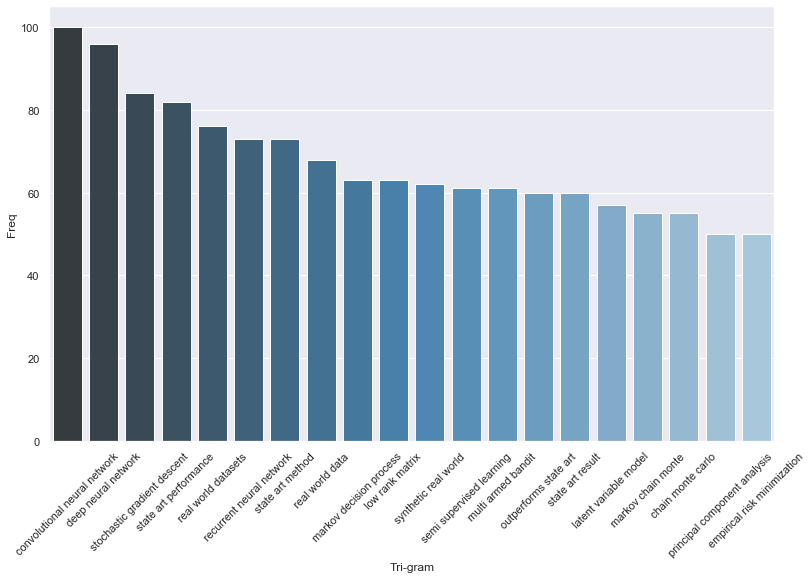

In [101]:
#Most frequently occuring Tri-grams
def top3words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
#Representation using bargraph
top3_words = top3words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
sns.set(style="whitegrid")
top3_df.columns=["Tri-gram", "Freq"]
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Refining word counts using TF-IDF to find context relevant keywords

In [102]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
feature_names = count_vectors.get_feature_names()
abstract = corpus[-1] 
tf_idf_vector = tfidf_transformer.transform(count_vectors.transform([abstract]))

In [105]:
#function for sorting the transformations
def coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True) 

def topn(feature_names, sorted_items, topn):    
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    for idx, score in sorted_items:
        score_vals.append(round(score, 2))
        feature_vals.append(feature_names[idx])
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]  
    return results

sorted_items = coo(tf_idf_vector.tocoo())
keywords = topn(feature_names,sorted_items, 10)

# Results

In [106]:
print("\nAbstract:")
print(abstract)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
consider maximum likelihood estimation linear dynamical system generalized linear observation model maximum likelihood typically considered hard setting since latent state transition parameter must inferred jointly given expectation maximization scale prone local minimum moment matching approach subspace identification literature become standard despite known statistical efficiency issue paper instead reconsider likelihood maximization develop optimization based strategy recovering latent state transition parameter key approach view reformulation maximum likelihood estimation linear dynamical system enables use global optimization algorithm matrix factorization proposed estimation strategy outperforms widely used identification algorithm subspace identification method term accuracy runtime

Keywords:
identification 0.27
likelihood 0.25
maximum likelihood 0.24
latent state 0.23
state transition 0.22
linear dynamical 0.21
likelihood estimation 0.2
maximum 0.19
dynamical system